In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
sys.path.append("./scegot")

In [6]:
import anndata
from scegot import scEGOT

# DATASET_INPUT_ROOT_PATH = os.path.join(os.getcwd(), "dataset/")
RANDOM_STATE = 2023
GMM_RANDOM_STATE = 3
PCA_N_COMPONENTS = 200
GMM_CLUSTER_NUMBERS = [1, 2, 4, 5, 5]
# UMAP_N_NEIGHBORS = 1000
DAY_NAMES = ["day0", "day0.5", "day1", "day1.5", "day2"]

# input_data = anndata.read_h5ad("/home/imoto-lab-dell2022/personal/mogi/Wang/dataset/WT_and_other_conditions/WT.h5ad")
# input_adata = anndata.read_h5ad("/home/imoto-lab-dell2022/personal/mogi/Wang/dataset/NKX12KO/NKX12.h5ad")
input_data = anndata.read_h5ad("/home/imoto-lab-dell2022/personal/mogi/scEGOT/scegot/dataset/GSE241287_scRNAseq_hPGCLC_induction.h5ad")

scegot = scEGOT(
    input_data,
    verbose=True,  # default=True
    adata_day_key="cluster_day",
)

X, pca_model = scegot.preprocess(
    PCA_N_COMPONENTS,
    recode_params={},
    umi_target_sum=1e5,
    pca_random_state=RANDOM_STATE,
    pca_other_params={},
    apply_recode=True,
    apply_normalization_log1p=True,
    apply_normalization_umi=True,
    select_genes=True,
    n_select_genes=2000,
)

gmm_models, gmm_labels = scegot.fit_predict_gmm(
    n_components_list=GMM_CLUSTER_NUMBERS,
    covariance_type="full",
    max_iter=2000,
    n_init=10,
    random_state=GMM_RANDOM_STATE,
    gmm_other_params={},
)

Processing AnnData...
Applying RECODE...
start RECODE for scRNA-seq data
end RECODE for scRNA-seq
log: {'seq_target': 'RNA', '#significant genes': 15820, '#non-significant genes': 2582, '#silent genes': 65, 'ell': 288, 'Elapsed time': '0h 0m 28s 903ms', 'solver': 'randomized', '#train_data': 2354}
Applying UMI normalization...
Applying log1p normalization...
Applying PCA...
	sum of explained_variance_ratio = 94.79824522006263
Fitting GMM models with each day's data and predicting labels for them...


100%|██████████| 5/5 [00:30<00:00,  6.09s/it]


In [7]:
cluster_names = scegot.generate_cluster_names_with_day()

In [8]:
cluster_names[2][3] = "day1-1"
cluster_names[4][3] = "day2-1"

In [9]:
cluster_names

[['day0-0'],
 ['day0.5-0', 'day0.5-1'],
 ['day1-0', 'day1-1', 'day1-2', 'day1-1'],
 ['day1.5-0', 'day1.5-1', 'day1.5-2', 'day1.5-3', 'day1.5-4'],
 ['day2-0', 'day2-1', 'day2-2', 'day2-1', 'day2-4']]

In [ ]:
G = scegot.make_cell_state_graph(
    cluster_names=cluster_names
    merge_same_clusters=True,
)

         node_days level_1 node_weights       xpos       ypos cluster_gmm  \
index                                                                       
day0-0           0       0          1.0 -15.440907   -6.12762           0   
day0.5-1         1       2     0.711229  -8.196223   9.311124           1   
day0.5-0         1       1     0.288771   -3.89549   8.465837           0   
day1-1           2       4     0.341155   0.479574  16.916159           1   
day1-0           2       3      0.33935   9.423355   3.102866           0   
day1-2           2       5     0.194946    6.28325   10.11362           2   
day1-1           2       6     0.124549   1.326261  16.390261           3   
day1.5-0         3       7     0.422292  26.286885  -6.842341           0   
day1.5-1         3       8     0.232005  23.690969  -3.049096           1   
day1.5-2         3       9     0.177344   4.876825  20.663192           2   
day1.5-3         3      10     0.120313   11.98619  15.951305           3   

In [11]:
import matplotlib.pyplot as plt

In [15]:
# fig = plt.figure(figsize=(15, 15))
# ax = fig.add_subplot(1, 1, 1)
G.plot_simple_cell_state_graph()

ValueError: The parameter 'weight_annotation' should be 'both', 'node', 'edge' or None.

In [16]:
order_dict = {node: i for i, node in enumerate(sorted(G.G.nodes()))}

In [17]:
G.G.nodes(data="cluster_weight")

NodeDataView({'day0-0': 0, 'day0.5-0': 1, 'day0.5-1': 0, 'day1-0': 1, 'day1-1': 3, 'day1-2': 2, 'day1.5-0': 0, 'day1.5-1': 1, 'day1.5-2': 2, 'day1.5-3': 3, 'day1.5-4': 4, 'day2-0': 0, 'day2-1': 3, 'day2-2': 2, 'day2-4': 4}, data='cluster_weight')

In [18]:
order_dict

{'day0-0': 0,
 'day0.5-0': 1,
 'day0.5-1': 2,
 'day1-0': 3,
 'day1-1': 4,
 'day1-2': 5,
 'day1.5-0': 6,
 'day1.5-1': 7,
 'day1.5-2': 8,
 'day1.5-3': 9,
 'day1.5-4': 10,
 'day2-0': 11,
 'day2-1': 12,
 'day2-2': 13,
 'day2-4': 14}

In [32]:
G._get_node_alphabetical_order()

{'day0-0': 0,
 'day0.5-0': 0,
 'day0.5-1': 1,
 'day1-0': 0,
 'day1-1': 1,
 'day1-2': 2,
 'day1.5-0': 0,
 'day1.5-1': 1,
 'day1.5-2': 2,
 'day1.5-3': 3,
 'day1.5-4': 4,
 'day2-0': 0,
 'day2-1': 1,
 'day2-2': 2,
 'day2-4': 3}

In [43]:
scegot._get_day_order_of_each_node()

[0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]

In [44]:
G.G.nodes(data="cluster_gmm")

NodeDataView({'day0-0': 0, 'day0.5-0': 0, 'day0.5-1': 1, 'day1-0': 0, 'day1-1': 3, 'day1-2': 2, 'day1.5-0': 0, 'day1.5-1': 1, 'day1.5-2': 2, 'day1.5-3': 3, 'day1.5-4': 4, 'day2-0': 0, 'day2-1': 3, 'day2-2': 2, 'day2-4': 4}, data='cluster_gmm')

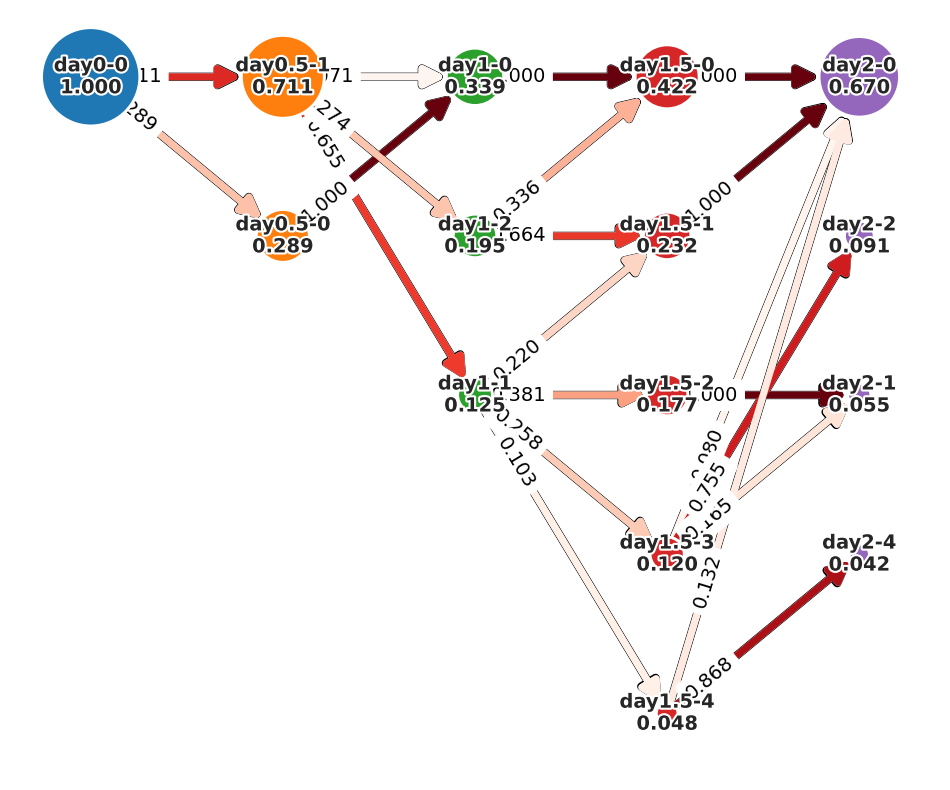

In [52]:
G.plot_simple_cell_state_graph(
    layout="hierarchy",
    y_position="weight",   
    weight_annotation="both",
    # order=None
)

In [ ]:
scegot.plot_cell_state_graph(G.G, cluster_names)

             HAND1       LUM      MYL4     RGS13    TMEM88    IGFBP3  \
day0-0    0.170068  0.093741  0.240333  0.234915  0.465988  0.282565   
day0.5-0  2.271507  0.428421  0.447206  0.286060  0.976881  0.480731   
day0.5-1  0.978603  0.159608  0.183212  0.126419  0.639227  0.727217   
day1-0    5.262938  0.779106  1.399954  1.964899  1.434259  0.204968   
day1-1    2.308969  0.787666  0.913235  0.500072  0.847178  0.426820   
day1-2    4.922143  0.612165  1.212084  0.667818  1.447771  0.806623   
day1-1    3.931290  1.182711  0.411503  0.633274  0.513326  0.744429   
day1.5-0  5.287651  3.810153  4.378969  4.467298  4.681303  1.136052   
day1.5-1  5.447762  2.421354  2.964158  3.247387  4.212585  1.582704   
day1.5-2  2.727297  0.496637  0.825763  1.165335  0.716660  0.805270   
day1.5-3  5.173658  1.066758  1.280947  1.551231  0.885339  3.738648   
day1.5-4  2.629309  1.641806  2.312176  1.861986  2.568151  0.794206   
day2-0    5.233063  4.496712  4.520484  3.943522  4.726659  3.34

ValueError: cannot reindex on an axis with duplicate labels